In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(16, 9), dpi=80)

GNI_AXIS_LABEL = "GNI per capita, PPP (2017 LCU)"
SUICIDE_AXIS_LABEL =  "Suicide rate (per 100 000)"
BIRTH_AXIS_LABEL = "Birth rate (per 1000)"

def axis_label(x = '', y = ''):
    plt.xlabel(x)
    plt.ylabel(y)


<Figure size 1280x720 with 0 Axes>

In [43]:
#load csv and only take data from 2000-2019
suicides = pd.read_csv('suicides.csv')
suicides = suicides.drop(suicides.loc[:,'Country Code':'1999'].columns, axis = 1).drop(columns = ['2020', '2021','Unnamed: 66'])
suicides.rename(columns = {'Country Name' : 'country'}, inplace = True)
suicides = suicides.melt(id_vars='country', var_name='year', value_name='suicide_rate', value_vars=list(suicides.columns[list(range(1,21))])).dropna()
suicides = suicides.astype({'year' : int})
suicides.info()

gni = pd.read_csv('GNI.csv')
gni = gni.drop(gni.loc[:,'Country Code':'1999'].columns, axis = 1).drop(columns = ['2020', '2021','Unnamed: 66'])
gni.rename(columns = {'Country Name' : 'country'}, inplace = True)
gni = gni.melt(id_vars='country', var_name='year', value_name='gni', value_vars=list(gni.columns[list(range(1,21))])).dropna()
gni = gni.astype({'year' : int})
gni.info()

birth_rate = pd.read_csv('birth_rate.csv')
birth_rate = birth_rate.drop(birth_rate.loc[:,'Country Code':'1999'].columns, axis = 1).drop(columns = ['2020', '2021','Unnamed: 66'])
birth_rate.rename(columns = {'Country Name' : 'country'}, inplace = True)
birth_rate = birth_rate.melt(id_vars='country', var_name='year', value_name='birth_rate', value_vars=list(birth_rate.columns[list(range(1,21))])).dropna()
birth_rate = birth_rate.astype({'year' : int})
birth_rate.info()


#find mean of each dataset per country 
mean_suicides = suicides.groupby('country').mean().reset_index()[['country', 'suicide_rate']]
mean_gni = gni.groupby('country').mean().reset_index()[['country', 'gni']]
mean_birth_rate = birth_rate.groupby('country').mean().reset_index()[['country', 'birth_rate']]


#find countries with top and bottom 10 highest suicide rate, measured on the average across the period
highest_suicide_countries = mean_suicides.nlargest(10,'suicide_rate')['country']
lowest_suicide_countries = mean_suicides.nsmallest(10,'suicide_rate')['country']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3720 entries, 1 to 4399
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       3720 non-null   object 
 1   year          3720 non-null   int32  
 2   suicide_rate  3720 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 101.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3669 entries, 1 to 5317
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  3669 non-null   object 
 1   year     3669 non-null   int32  
 2   gni      3669 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 100.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5319
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5062 non-null   object 
 1   year        5062 non-

In [58]:
highest_suicide_rate = suicides[suicides['country'].isin(highest_suicide_countries)]
lowest_suicide_rate = suicides[suicides['country'].isin(lowest_suicide_countries)]

highest_suicide_rate.set_index('year', inplace=True)
lowest_suicide_rate.set_index('year', inplace=True)

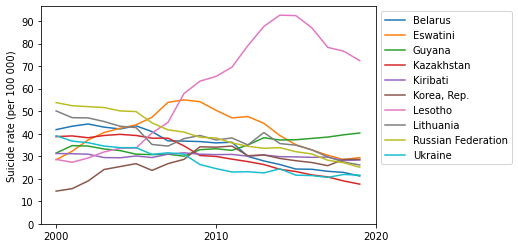

In [59]:
highest_suicide_rate.groupby('country')['suicide_rate'].plot(kind = 'line', legend = True)
plt.xticks(ticks = [2000,2010,2020])
plt.yticks(np.arange(0,100,10))
plt.legend(bbox_to_anchor=(1.0, 1.0))
axis_label(y = SUICIDE_AXIS_LABEL)


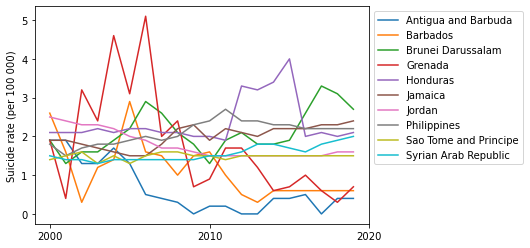

In [46]:
lowest_suicide_rate.groupby('country')['suicide_rate'].plot(kind = 'line', legend = True)
plt.xticks(ticks = [2000,2010,2020])
plt.legend(bbox_to_anchor=(1.0, 1.0))
axis_label(y = SUICIDE_AXIS_LABEL)

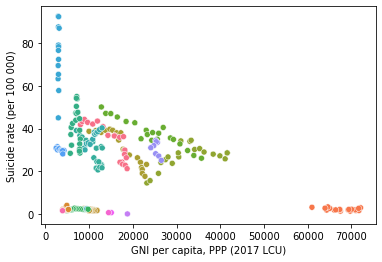

In [47]:
highest_suicide_gni = gni[gni['country'].isin(highest_suicide_countries)]
lowest_suicide_gni = gni[gni['country'].isin(lowest_suicide_countries)]

highest_suicide_gni.set_index('year', inplace=True)
lowest_suicide_gni.set_index('year', inplace=True)

gni_suicide = pd.merge(gni, pd.concat([highest_suicide_rate, lowest_suicide_rate]).reset_index(), on = ['country', 'year'])

sns.scatterplot(x='gni', y='suicide_rate', data=gni_suicide, hue='country', legend=False)
axis_label(y = SUICIDE_AXIS_LABEL, x = GNI_AXIS_LABEL)

Text(0.5, 1.0, 'Year 2000-2019 average')

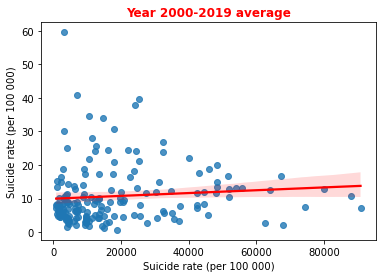

In [48]:
#Plo
sns.regplot(data = pd.merge(mean_gni, mean_suicides, on = 'country'), x = 'gni', y ='suicide_rate', line_kws={"color": "red"})
axis_label(y = SUICIDE_AXIS_LABEL, x = SUICIDE_AXIS_LABEL)
plt.title('Year 2000-2019 average', color = 'red', weight = "bold")

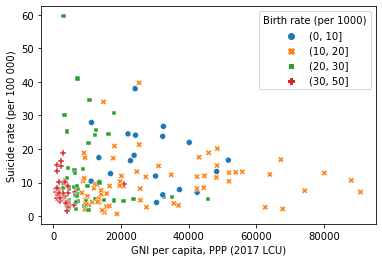

In [68]:
gni_suicide_birth = mean_gni.merge(mean_suicides, on='country').merge(mean_birth_rate, on='country')
gni_suicide_birth['range'] = pd.cut(x=gni_suicide_birth['birth_rate'], bins=[0,10,20,30,50])

sns.scatterplot(data = gni_suicide_birth, x = 'gni', y = 'suicide_rate', style = 'range', hue = 'range')
plt.legend(title = 'Birth rate (per 1000)')
axis_label(x = GNI_AXIS_LABEL, y = SUICIDE_AXIS_LABEL)

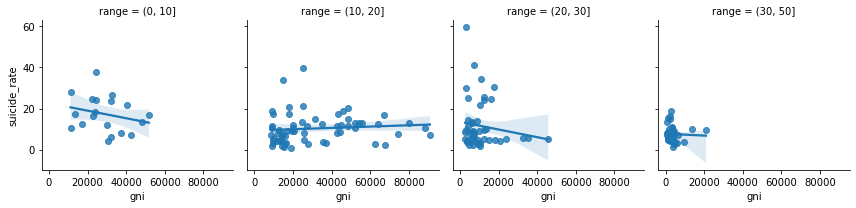

In [85]:
g = sns.FacetGrid(gni_suicide_birth, col = 'range')
g.map(sns.regplot, 'gni', 'suicide_rate')


In [91]:
gni_suicide_birth.groupby('range').describe()

gni                                                          \
         count          mean           std           min           25%   
range                                                                    
(0, 10]   19.0  28841.748625  11746.474619  11174.748044  22426.860496   
(10, 20]  63.0  31261.968443  21835.304730   8452.927627  14149.534557   
(20, 30]  50.0  10460.470156   8574.650010   2640.321117   5001.725186   
(30, 50]  47.0   3408.339900   3478.937330    817.037929   1603.522919   

                                                   suicide_rate             \
                   50%           75%           max        count       mean   
range                                                                        
(0, 10]   30208.827959  34920.936344  51745.700977         19.0  17.345263   
(10, 20]  24678.909226  45312.039166  90859.122944         63.0  10.314224   
(20, 30]   7303.377716  12330.321513  45709.796583         50.0  11.597479   
(30, 50]   2292.430345   3947.599057  20972.844761         47.0   7.608784   

          ...                  birth_rate                                 \
          ...       75%    max      count       mean       std       min   
range     ...                                                              
(0, 10]   ...  23.96000  37.98       19.0   9.424005  0.413815   8.38900   
(10, 20]  ...  12.99000  39.72       63.0  14.066728  2.838449  10.11000   
(20, 30]  ...  13.42125  59.57       50.0  23.911004  2.929365  20.35355   
(30, 50]  ...   8.99250  18.75       47.0  38.206085  4.521564  30.27750   

                                                    
                25%       50%        75%       max  
range                                               
(0, 10]    9.250000   9.47000   9.722500   9.99500  
(10, 20]  11.501725  13.16500  17.142250  18.85325  
(20, 30]  21.488837  22.93605  26.174800  29.90580  
(30, 50]  35.003350  37.92915  40.862825  49.84595  

[4 rows x 24 columns]

In [113]:
suicide_proportion = pd.read_csv("suicide_by_gender.csv")

def calc(x, y):
    return x/(x+y) * 100

suicide_proportion = suicide_proportion.assign(
    male_percentage = lambda df: calc(df['rate2019male'], df['rate2019female'])
).assign(
    female_percentage = lambda df: calc(df['rate2019female'], df['rate2019male'])
)

suicide_proportion = suicide_proportion[['country', 'male_percentage', 'female_percentage']]

suicide_proportion.describe()

,male_percentage,female_percentage
count,179.000000,179.000000
mean,75.341505,24.658495
std,9.495512,9.495512
min,0.000000,6.574394
25%,70.386586,18.769883
50%,76.146789,23.853211
75%,81.230117,29.613414
max,93.425606,100.000000
